## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_TIP
data_TIP.head(2)

,Adj Close
Date,
2009-06-01,79.87307
2009-06-08,80.43000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a44bbf1d0>],
      dtype=object)

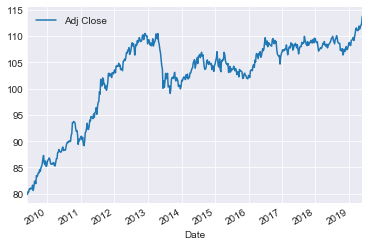

In [3]:
data_TIP.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_TIP)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.        ],
       [0.01643672]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:18:28.764544 4562425280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:18:28.767194 4562425280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:18:28.770560 4562425280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:18:29.117043 4562425280 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:18:29.378397 4562425280 deprecation.py:323] From //anaconda3/li

Epoch 1/2000
311/311 [==============================] - 3s 10ms/step - loss: 0.3158
Epoch 2/2000
311/311 [==============================] - 0s 430us/step - loss: 0.2245
Epoch 3/2000
311/311 [==============================] - 0s 430us/step - loss: 0.1473
Epoch 4/2000
311/311 [==============================] - 0s 392us/step - loss: 0.0859
Epoch 5/2000
311/311 [==============================] - 0s 343us/step - loss: 0.0448
Epoch 6/2000
311/311 [==============================] - 0s 373us/step - loss: 0.0252
Epoch 7/2000
311/311 [==============================] - 0s 371us/step - loss: 0.0203
Epoch 8/2000
311/311 [==============================] - 0s 347us/step - loss: 0.0206
Epoch 9/2000
311/311 [==============================] - 0s 343us/step - loss: 0.0207
Epoch 10/2000
311/311 [==============================] - 0s 345us/step - loss: 0.0199
Epoch 11/2000
311/311 [==============================] - 0s 335us/step - loss: 0.0189
Epoch 12/2000
311/311 [==============================] - 0s 373u

311/311 [==============================] - 0s 369us/step - loss: 6.0196e-04
Epoch 95/2000
311/311 [==============================] - 0s 345us/step - loss: 6.0172e-04
Epoch 96/2000
311/311 [==============================] - 0s 352us/step - loss: 6.0148e-04
Epoch 97/2000
311/311 [==============================] - 0s 360us/step - loss: 6.0125e-04
Epoch 98/2000
311/311 [==============================] - 0s 361us/step - loss: 6.0101e-04
Epoch 99/2000
311/311 [==============================] - 0s 364us/step - loss: 6.0077e-04
Epoch 100/2000
311/311 [==============================] - 0s 372us/step - loss: 6.0053e-04
Epoch 101/2000
311/311 [==============================] - 0s 375us/step - loss: 6.0029e-04
Epoch 102/2000
311/311 [==============================] - 0s 370us/step - loss: 6.0004e-04
Epoch 103/2000
311/311 [==============================] - 0s 357us/step - loss: 5.9980e-04
Epoch 104/2000
311/311 [==============================] - 0s 353us/step - loss: 5.9956e-04
Epoch 105/2000
311/

311/311 [==============================] - 0s 362us/step - loss: 5.7896e-04
Epoch 185/2000
311/311 [==============================] - 0s 360us/step - loss: 5.7870e-04
Epoch 186/2000
311/311 [==============================] - 0s 355us/step - loss: 5.7845e-04
Epoch 187/2000
311/311 [==============================] - 0s 350us/step - loss: 5.7820e-04
Epoch 188/2000
311/311 [==============================] - 0s 362us/step - loss: 5.7795e-04
Epoch 189/2000
311/311 [==============================] - 0s 349us/step - loss: 5.7770e-04
Epoch 190/2000
311/311 [==============================] - 0s 350us/step - loss: 5.7746e-04
Epoch 191/2000
311/311 [==============================] - 0s 366us/step - loss: 5.7721e-04
Epoch 192/2000
311/311 [==============================] - 0s 353us/step - loss: 5.7696e-04
Epoch 193/2000
311/311 [==============================] - 0s 353us/step - loss: 5.7672e-04
Epoch 194/2000
311/311 [==============================] - 0s 350us/step - loss: 5.7647e-04
Epoch 195/2000

311/311 [==============================] - 0s 365us/step - loss: 5.6197e-04
Epoch 275/2000
311/311 [==============================] - 0s 366us/step - loss: 5.6188e-04
Epoch 276/2000
311/311 [==============================] - 0s 366us/step - loss: 5.6180e-04
Epoch 277/2000
311/311 [==============================] - 0s 356us/step - loss: 5.6171e-04
Epoch 278/2000
311/311 [==============================] - 0s 359us/step - loss: 5.6163e-04
Epoch 279/2000
311/311 [==============================] - 0s 364us/step - loss: 5.6155e-04
Epoch 280/2000
311/311 [==============================] - 0s 359us/step - loss: 5.6148e-04
Epoch 281/2000
311/311 [==============================] - 0s 364us/step - loss: 5.6141e-04
Epoch 282/2000
311/311 [==============================] - 0s 372us/step - loss: 5.6134e-04
Epoch 283/2000
311/311 [==============================] - 0s 370us/step - loss: 5.6127e-04
Epoch 284/2000
311/311 [==============================] - 0s 362us/step - loss: 5.6121e-04
Epoch 285/2000

311/311 [==============================] - 0s 511us/step - loss: 5.6637e-04
Epoch 365/2000
311/311 [==============================] - 0s 460us/step - loss: 5.6655e-04
Epoch 366/2000
311/311 [==============================] - 0s 425us/step - loss: 5.6673e-04
Epoch 367/2000
311/311 [==============================] - 0s 448us/step - loss: 5.6692e-04
Epoch 368/2000
311/311 [==============================] - 0s 416us/step - loss: 5.6710e-04
Epoch 369/2000
311/311 [==============================] - 0s 428us/step - loss: 5.6729e-04
Epoch 370/2000
311/311 [==============================] - 0s 416us/step - loss: 5.6748e-04
Epoch 371/2000
311/311 [==============================] - 0s 463us/step - loss: 5.6767e-04
Epoch 372/2000
311/311 [==============================] - 0s 442us/step - loss: 5.6786e-04
Epoch 373/2000
311/311 [==============================] - 0s 452us/step - loss: 5.6806e-04
Epoch 374/2000
311/311 [==============================] - 0s 450us/step - loss: 5.6825e-04
Epoch 375/2000

311/311 [==============================] - 0s 450us/step - loss: 5.8055e-04
Epoch 455/2000
311/311 [==============================] - 0s 441us/step - loss: 5.8062e-04
Epoch 456/2000
311/311 [==============================] - 0s 436us/step - loss: 5.8070e-04
Epoch 457/2000
311/311 [==============================] - 0s 438us/step - loss: 5.8076e-04
Epoch 458/2000
311/311 [==============================] - 0s 402us/step - loss: 5.8082e-04
Epoch 459/2000
311/311 [==============================] - 0s 397us/step - loss: 5.8087e-04
Epoch 460/2000
311/311 [==============================] - 0s 388us/step - loss: 5.8093e-04
Epoch 461/2000
311/311 [==============================] - 0s 394us/step - loss: 5.8099e-04
Epoch 462/2000
311/311 [==============================] - 0s 413us/step - loss: 5.8104e-04
Epoch 463/2000
311/311 [==============================] - 0s 401us/step - loss: 5.8109e-04
Epoch 464/2000
311/311 [==============================] - 0s 416us/step - loss: 5.8113e-04
Epoch 465/2000

311/311 [==============================] - 0s 413us/step - loss: 5.8208e-04
Epoch 545/2000
311/311 [==============================] - 0s 376us/step - loss: 5.8208e-04
Epoch 546/2000
311/311 [==============================] - 0s 376us/step - loss: 5.8207e-04
Epoch 547/2000
311/311 [==============================] - 0s 374us/step - loss: 5.8209e-04
Epoch 548/2000
311/311 [==============================] - 0s 376us/step - loss: 5.8209e-04
Epoch 549/2000
311/311 [==============================] - 0s 390us/step - loss: 5.8207e-04
Epoch 550/2000
311/311 [==============================] - 0s 391us/step - loss: 5.8204e-04
Epoch 551/2000
311/311 [==============================] - 0s 419us/step - loss: 5.8201e-04
Epoch 552/2000
311/311 [==============================] - 0s 388us/step - loss: 5.8201e-04
Epoch 553/2000
311/311 [==============================] - 0s 390us/step - loss: 5.8202e-04
Epoch 554/2000
311/311 [==============================] - 0s 397us/step - loss: 5.8206e-04
Epoch 555/2000

311/311 [==============================] - 0s 376us/step - loss: 5.8125e-04
Epoch 635/2000
311/311 [==============================] - 0s 364us/step - loss: 5.8122e-04
Epoch 636/2000
311/311 [==============================] - 0s 366us/step - loss: 5.8121e-04
Epoch 637/2000
311/311 [==============================] - 0s 373us/step - loss: 5.8121e-04
Epoch 638/2000
311/311 [==============================] - 0s 375us/step - loss: 5.8121e-04
Epoch 639/2000
311/311 [==============================] - 0s 371us/step - loss: 5.8120e-04
Epoch 640/2000
311/311 [==============================] - 0s 374us/step - loss: 5.8118e-04
Epoch 641/2000
311/311 [==============================] - 0s 374us/step - loss: 5.8117e-04
Epoch 642/2000
311/311 [==============================] - 0s 371us/step - loss: 5.8116e-04
Epoch 643/2000
311/311 [==============================] - 0s 366us/step - loss: 5.8116e-04
Epoch 644/2000
311/311 [==============================] - 0s 395us/step - loss: 5.8115e-04
Epoch 645/2000

311/311 [==============================] - 0s 370us/step - loss: 5.8042e-04
Epoch 725/2000
311/311 [==============================] - 0s 363us/step - loss: 5.8041e-04
Epoch 726/2000
311/311 [==============================] - 0s 363us/step - loss: 5.8040e-04
Epoch 727/2000
311/311 [==============================] - 0s 368us/step - loss: 5.8039e-04
Epoch 728/2000
311/311 [==============================] - 0s 369us/step - loss: 5.8039e-04
Epoch 729/2000
311/311 [==============================] - 0s 392us/step - loss: 5.8038e-04
Epoch 730/2000
311/311 [==============================] - 0s 367us/step - loss: 5.8037e-04
Epoch 731/2000
311/311 [==============================] - 0s 360us/step - loss: 5.8036e-04
Epoch 732/2000
311/311 [==============================] - 0s 365us/step - loss: 5.8035e-04
Epoch 733/2000
311/311 [==============================] - 0s 359us/step - loss: 5.8035e-04
Epoch 734/2000
311/311 [==============================] - 0s 355us/step - loss: 5.8034e-04
Epoch 735/2000

311/311 [==============================] - 0s 377us/step - loss: 5.7974e-04
Epoch 815/2000
311/311 [==============================] - 0s 364us/step - loss: 5.7974e-04
Epoch 816/2000
311/311 [==============================] - 0s 369us/step - loss: 5.7975e-04
Epoch 817/2000
311/311 [==============================] - 0s 364us/step - loss: 5.7975e-04
Epoch 818/2000
311/311 [==============================] - 0s 363us/step - loss: 5.7973e-04
Epoch 819/2000
311/311 [==============================] - 0s 372us/step - loss: 5.7971e-04
Epoch 820/2000
311/311 [==============================] - 0s 360us/step - loss: 5.7969e-04
Epoch 821/2000
311/311 [==============================] - 0s 363us/step - loss: 5.7970e-04
Epoch 822/2000
311/311 [==============================] - 0s 376us/step - loss: 5.7970e-04
Epoch 823/2000
311/311 [==============================] - 0s 374us/step - loss: 5.7969e-04
Epoch 824/2000
311/311 [==============================] - 0s 381us/step - loss: 5.7968e-04
Epoch 825/2000

311/311 [==============================] - 0s 369us/step - loss: 5.7916e-04
Epoch 905/2000
311/311 [==============================] - 0s 367us/step - loss: 5.7915e-04
Epoch 906/2000
311/311 [==============================] - 0s 379us/step - loss: 5.7914e-04
Epoch 907/2000
311/311 [==============================] - 0s 367us/step - loss: 5.7913e-04
Epoch 908/2000
311/311 [==============================] - 0s 357us/step - loss: 5.7913e-04
Epoch 909/2000
311/311 [==============================] - 0s 364us/step - loss: 5.7912e-04
Epoch 910/2000
311/311 [==============================] - 0s 365us/step - loss: 5.7912e-04
Epoch 911/2000
311/311 [==============================] - 0s 368us/step - loss: 5.7911e-04
Epoch 912/2000
311/311 [==============================] - 0s 365us/step - loss: 5.7910e-04
Epoch 913/2000
311/311 [==============================] - 0s 365us/step - loss: 5.7909e-04
Epoch 914/2000
311/311 [==============================] - 0s 363us/step - loss: 5.7909e-04
Epoch 915/2000

311/311 [==============================] - 0s 375us/step - loss: 5.7859e-04
Epoch 995/2000
311/311 [==============================] - 0s 367us/step - loss: 5.7858e-04
Epoch 996/2000
311/311 [==============================] - 0s 369us/step - loss: 5.7857e-04
Epoch 997/2000
311/311 [==============================] - 0s 368us/step - loss: 5.7856e-04
Epoch 998/2000
311/311 [==============================] - 0s 360us/step - loss: 5.7855e-04
Epoch 999/2000
311/311 [==============================] - 0s 366us/step - loss: 5.7855e-04
Epoch 1000/2000
311/311 [==============================] - 0s 365us/step - loss: 5.7855e-04
Epoch 1001/2000
311/311 [==============================] - 0s 375us/step - loss: 5.7854e-04
Epoch 1002/2000
311/311 [==============================] - 0s 376us/step - loss: 5.7853e-04
Epoch 1003/2000
311/311 [==============================] - 0s 379us/step - loss: 5.7853e-04
Epoch 1004/2000
311/311 [==============================] - 0s 374us/step - loss: 5.7852e-04
Epoch 100

311/311 [==============================] - 0s 374us/step - loss: 5.7804e-04
Epoch 1084/2000
311/311 [==============================] - 0s 364us/step - loss: 5.7803e-04
Epoch 1085/2000
311/311 [==============================] - 0s 367us/step - loss: 5.7802e-04
Epoch 1086/2000
311/311 [==============================] - 0s 358us/step - loss: 5.7802e-04
Epoch 1087/2000
311/311 [==============================] - 0s 361us/step - loss: 5.7801e-04
Epoch 1088/2000
311/311 [==============================] - 0s 372us/step - loss: 5.7801e-04
Epoch 1089/2000
311/311 [==============================] - 0s 358us/step - loss: 5.7800e-04
Epoch 1090/2000
311/311 [==============================] - 0s 360us/step - loss: 5.7799e-04
Epoch 1091/2000
311/311 [==============================] - 0s 360us/step - loss: 5.7799e-04
Epoch 1092/2000
311/311 [==============================] - 0s 364us/step - loss: 5.7799e-04
Epoch 1093/2000
311/311 [==============================] - 0s 362us/step - loss: 5.7798e-04
Epoc

311/311 [==============================] - 0s 374us/step - loss: 5.7751e-04
Epoch 1173/2000
311/311 [==============================] - 0s 367us/step - loss: 5.7751e-04
Epoch 1174/2000
311/311 [==============================] - 0s 382us/step - loss: 5.7750e-04
Epoch 1175/2000
311/311 [==============================] - 0s 376us/step - loss: 5.7749e-04
Epoch 1176/2000
311/311 [==============================] - 0s 383us/step - loss: 5.7750e-04
Epoch 1177/2000
311/311 [==============================] - 0s 395us/step - loss: 5.7751e-04
Epoch 1178/2000
311/311 [==============================] - 0s 416us/step - loss: 5.7750e-04
Epoch 1179/2000
311/311 [==============================] - 0s 404us/step - loss: 5.7746e-04
Epoch 1180/2000
311/311 [==============================] - 0s 397us/step - loss: 5.7744e-04
Epoch 1181/2000
311/311 [==============================] - 0s 405us/step - loss: 5.7744e-04
Epoch 1182/2000
311/311 [==============================] - 0s 392us/step - loss: 5.7745e-04
Epoc

311/311 [==============================] - 0s 382us/step - loss: 5.7701e-04
Epoch 1262/2000
311/311 [==============================] - 0s 381us/step - loss: 5.7705e-04
Epoch 1263/2000
311/311 [==============================] - 0s 389us/step - loss: 5.7705e-04
Epoch 1264/2000
311/311 [==============================] - 0s 395us/step - loss: 5.7718e-04
Epoch 1265/2000
311/311 [==============================] - 0s 392us/step - loss: 5.7720e-04
Epoch 1266/2000
311/311 [==============================] - 0s 372us/step - loss: 5.7722e-04
Epoch 1267/2000
311/311 [==============================] - 0s 383us/step - loss: 5.7706e-04
Epoch 1268/2000
311/311 [==============================] - 0s 375us/step - loss: 5.7689e-04
Epoch 1269/2000
311/311 [==============================] - 0s 380us/step - loss: 5.7688e-04
Epoch 1270/2000
311/311 [==============================] - 0s 371us/step - loss: 5.7696e-04
Epoch 1271/2000
311/311 [==============================] - 0s 366us/step - loss: 5.7701e-04
Epoc

311/311 [==============================] - 0s 404us/step - loss: 5.7664e-04
Epoch 1351/2000
311/311 [==============================] - 0s 382us/step - loss: 5.7668e-04
Epoch 1352/2000
311/311 [==============================] - 0s 391us/step - loss: 5.7656e-04
Epoch 1353/2000
311/311 [==============================] - 0s 384us/step - loss: 5.7645e-04
Epoch 1354/2000
311/311 [==============================] - 0s 391us/step - loss: 5.7643e-04
Epoch 1355/2000
311/311 [==============================] - 0s 377us/step - loss: 5.7653e-04
Epoch 1356/2000
311/311 [==============================] - 0s 381us/step - loss: 5.7658e-04
Epoch 1357/2000
311/311 [==============================] - 0s 385us/step - loss: 5.7655e-04
Epoch 1358/2000
311/311 [==============================] - 0s 382us/step - loss: 5.7645e-04
Epoch 1359/2000
311/311 [==============================] - 0s 390us/step - loss: 5.7641e-04
Epoch 1360/2000
311/311 [==============================] - 0s 381us/step - loss: 5.7643e-04
Epoc

311/311 [==============================] - 0s 347us/step - loss: 5.7626e-04
Epoch 1440/2000
311/311 [==============================] - 0s 447us/step - loss: 5.7609e-04
Epoch 1441/2000
311/311 [==============================] - 0s 460us/step - loss: 5.7601e-04
Epoch 1442/2000
311/311 [==============================] - 0s 359us/step - loss: 5.7608e-04
Epoch 1443/2000
311/311 [==============================] - 0s 411us/step - loss: 5.7618e-04
Epoch 1444/2000
311/311 [==============================] - 0s 569us/step - loss: 5.7616e-04
Epoch 1445/2000
311/311 [==============================] - 0s 443us/step - loss: 5.7602e-04
Epoch 1446/2000
311/311 [==============================] - 0s 456us/step - loss: 5.7590e-04
Epoch 1447/2000
311/311 [==============================] - 0s 451us/step - loss: 5.7592e-04
Epoch 1448/2000
311/311 [==============================] - 0s 409us/step - loss: 5.7601e-04
Epoch 1449/2000
311/311 [==============================] - 0s 459us/step - loss: 5.7604e-04
Epoc

311/311 [==============================] - 0s 392us/step - loss: 5.7585e-04
Epoch 1529/2000
311/311 [==============================] - 0s 466us/step - loss: 5.7610e-04
Epoch 1530/2000
311/311 [==============================] - 0s 455us/step - loss: 5.7612e-04
Epoch 1531/2000
311/311 [==============================] - 0s 444us/step - loss: 5.7594e-04
Epoch 1532/2000
311/311 [==============================] - 0s 407us/step - loss: 5.7569e-04
Epoch 1533/2000
311/311 [==============================] - 0s 394us/step - loss: 5.7553e-04
Epoch 1534/2000
311/311 [==============================] - 0s 378us/step - loss: 5.7551e-04
Epoch 1535/2000
311/311 [==============================] - 0s 386us/step - loss: 5.7558e-04
Epoch 1536/2000
311/311 [==============================] - 0s 405us/step - loss: 5.7562e-04
Epoch 1537/2000
311/311 [==============================] - 0s 395us/step - loss: 5.7560e-04
Epoch 1538/2000
311/311 [==============================] - 0s 393us/step - loss: 5.7555e-04
Epoc

311/311 [==============================] - 0s 285us/step - loss: 5.7533e-04
Epoch 1618/2000
311/311 [==============================] - 0s 292us/step - loss: 5.7553e-04
Epoch 1619/2000
311/311 [==============================] - 0s 300us/step - loss: 5.7547e-04
Epoch 1620/2000
311/311 [==============================] - 0s 293us/step - loss: 5.7523e-04
Epoch 1621/2000
311/311 [==============================] - 0s 289us/step - loss: 5.7507e-04
Epoch 1622/2000
311/311 [==============================] - 0s 302us/step - loss: 5.7513e-04
Epoch 1623/2000
311/311 [==============================] - 0s 297us/step - loss: 5.7527e-04
Epoch 1624/2000
311/311 [==============================] - 0s 294us/step - loss: 5.7532e-04
Epoch 1625/2000
311/311 [==============================] - 0s 288us/step - loss: 5.7524e-04
Epoch 1626/2000
311/311 [==============================] - 0s 288us/step - loss: 5.7516e-04
Epoch 1627/2000
311/311 [==============================] - 0s 286us/step - loss: 5.7516e-04
Epoc

311/311 [==============================] - 0s 344us/step - loss: 5.7508e-04
Epoch 1707/2000
311/311 [==============================] - 0s 344us/step - loss: 5.7493e-04
Epoch 1708/2000
311/311 [==============================] - 0s 336us/step - loss: 5.7488e-04
Epoch 1709/2000
311/311 [==============================] - 0s 324us/step - loss: 5.7501e-04
Epoch 1710/2000
311/311 [==============================] - 0s 328us/step - loss: 5.7523e-04
Epoch 1711/2000
311/311 [==============================] - 0s 334us/step - loss: 5.7525e-04
Epoch 1712/2000
311/311 [==============================] - 0s 330us/step - loss: 5.7517e-04
Epoch 1713/2000
311/311 [==============================] - 0s 331us/step - loss: 5.7516e-04
Epoch 1714/2000
311/311 [==============================] - 0s 341us/step - loss: 5.7520e-04
Epoch 1715/2000
311/311 [==============================] - 0s 326us/step - loss: 5.7518e-04
Epoch 1716/2000
311/311 [==============================] - 0s 328us/step - loss: 5.7505e-04
Epoc

311/311 [==============================] - 0s 363us/step - loss: 5.7501e-04
Epoch 1796/2000
311/311 [==============================] - 0s 332us/step - loss: 5.7490e-04
Epoch 1797/2000
311/311 [==============================] - 0s 347us/step - loss: 5.7462e-04
Epoch 1798/2000
311/311 [==============================] - 0s 343us/step - loss: 5.7449e-04
Epoch 1799/2000
311/311 [==============================] - 0s 339us/step - loss: 5.7471e-04
Epoch 1800/2000
311/311 [==============================] - 0s 348us/step - loss: 5.7496e-04
Epoch 1801/2000
311/311 [==============================] - 0s 349us/step - loss: 5.7482e-04
Epoch 1802/2000
311/311 [==============================] - 0s 338us/step - loss: 5.7443e-04
Epoch 1803/2000
311/311 [==============================] - 0s 300us/step - loss: 5.7422e-04
Epoch 1804/2000
311/311 [==============================] - 0s 291us/step - loss: 5.7434e-04
Epoch 1805/2000
311/311 [==============================] - 0s 284us/step - loss: 5.7457e-04
Epoc

311/311 [==============================] - 0s 349us/step - loss: 5.7429e-04
Epoch 1885/2000
311/311 [==============================] - 0s 306us/step - loss: 5.7442e-04
Epoch 1886/2000
311/311 [==============================] - 0s 289us/step - loss: 5.7445e-04
Epoch 1887/2000
311/311 [==============================] - 0s 274us/step - loss: 5.7442e-04
Epoch 1888/2000
311/311 [==============================] - 0s 305us/step - loss: 5.7443e-04
Epoch 1889/2000
311/311 [==============================] - 0s 309us/step - loss: 5.7444e-04
Epoch 1890/2000
311/311 [==============================] - 0s 302us/step - loss: 5.7436e-04
Epoch 1891/2000
311/311 [==============================] - 0s 276us/step - loss: 5.7417e-04
Epoch 1892/2000
311/311 [==============================] - 0s 278us/step - loss: 5.7405e-04
Epoch 1893/2000
311/311 [==============================] - 0s 293us/step - loss: 5.7407e-04
Epoch 1894/2000
311/311 [==============================] - 0s 299us/step - loss: 5.7417e-04
Epoc

311/311 [==============================] - 0s 288us/step - loss: 5.7379e-04
Epoch 1974/2000
311/311 [==============================] - 0s 272us/step - loss: 5.7383e-04
Epoch 1975/2000
311/311 [==============================] - 0s 267us/step - loss: 5.7402e-04
Epoch 1976/2000
311/311 [==============================] - 0s 268us/step - loss: 5.7418e-04
Epoch 1977/2000
311/311 [==============================] - 0s 269us/step - loss: 5.7410e-04
Epoch 1978/2000
311/311 [==============================] - 0s 264us/step - loss: 5.7385e-04
Epoch 1979/2000
311/311 [==============================] - 0s 274us/step - loss: 5.7371e-04
Epoch 1980/2000
311/311 [==============================] - 0s 267us/step - loss: 5.7377e-04
Epoch 1981/2000
311/311 [==============================] - 0s 271us/step - loss: 5.7391e-04
Epoch 1982/2000
311/311 [==============================] - 0s 266us/step - loss: 5.7394e-04
Epoch 1983/2000
311/311 [==============================] - 0s 264us/step - loss: 5.7387e-04
Epoc

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 0.79 RMSE
Testing score: 0.61 RMSE


### Plotting and comparing original data, predictions, forecasts

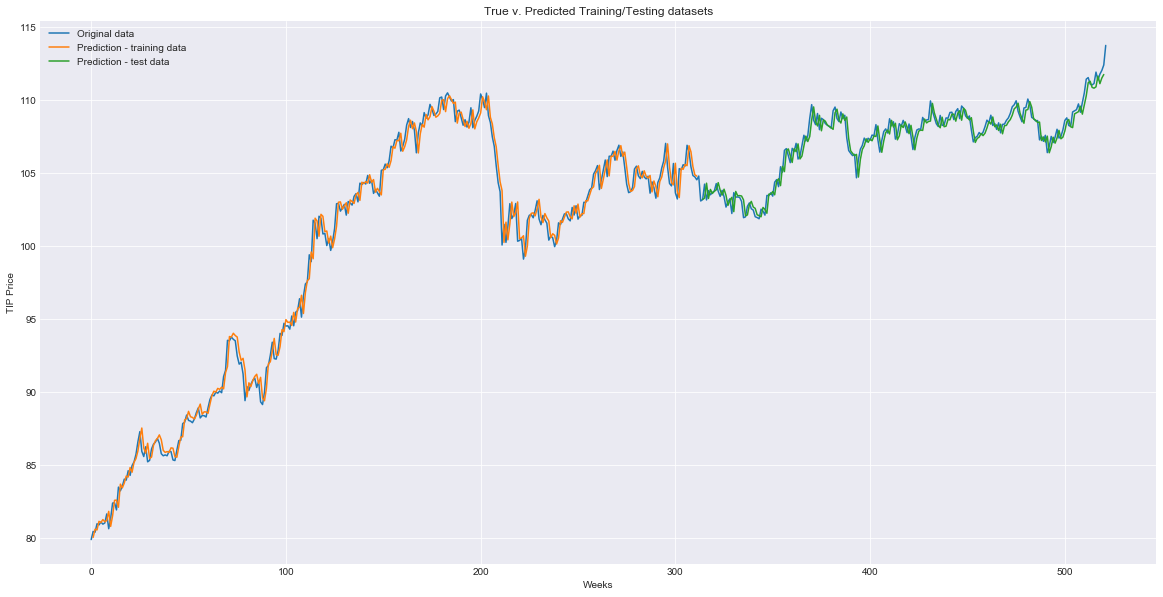

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('TIP Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [14]:
LSTM_pred_TIP = pd.DataFrame(test_pred)
%store LSTM_pred_TIP

Stored 'LSTM_pred_TIP' (DataFrame)
